# Import libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import linear_model, ensemble
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.pipeline import make_pipeline,Pipeline


In [33]:
#Loading the dataset
dataset = pd.read_csv("{Dataset Path}\Crop_recommendation.csv");
dataset.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [34]:
#Print Data shape
print("Dataframe shape : " , dataset.shape)

Dataframe shape :  (2200, 8)


In [35]:
#Show a headers in dataset
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [36]:
# Check missing values
dataset.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [37]:
#Lable names and value counts
dataset['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [38]:
#Check dataset has any null value
dataset.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [39]:
# Dataset Summary
crop_summary = dataset.pivot_table(dataset, index =['label'],aggfunc = 'mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [40]:
# Described Dataset
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


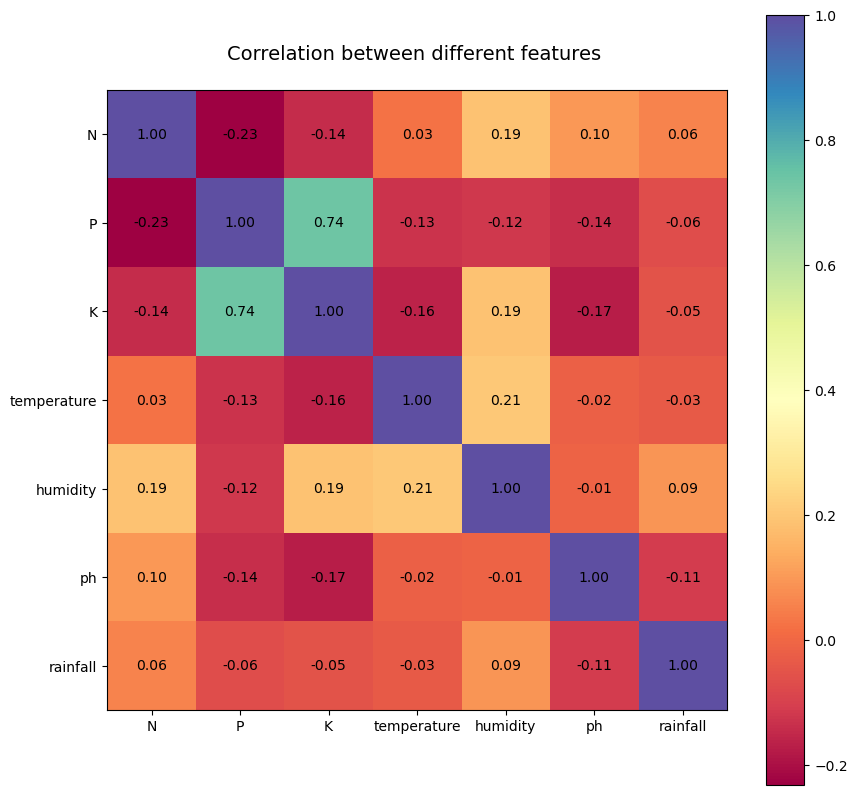

In [41]:
#Graph
graph = dataset[['N', 'P', 'K', 'temperature','humidity','ph','rainfall']]
graph.corr()
plt.title('Correlation between different features \n', fontsize=14)
plt.imshow(graph.corr(), cmap='Spectral')
plt.colorbar()
plt.gcf().set_size_inches(10, 10)
plt.xticks(range(len(graph.corr().columns)), graph.corr().columns)
plt.yticks(range(len(graph.corr().columns)), graph.corr().columns)

labels = graph.corr().values
for a in range(labels.shape[0]):
    for b in range(labels.shape[1]):
        plt.text(a, b, '{:.2f}'.format(labels[b, a]), ha='center', va='center', color='black')
plt.show()

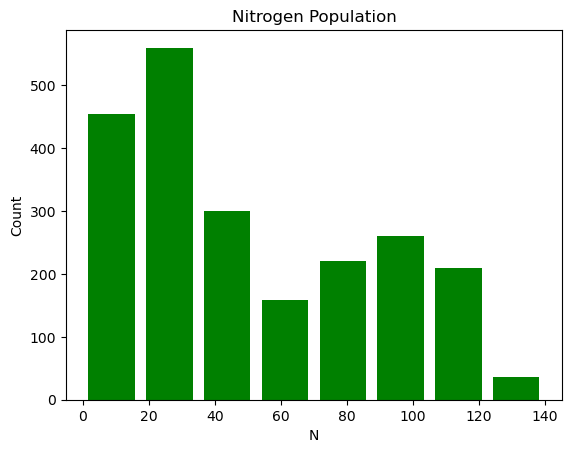

In [42]:
#Histogram
population_N = dataset["N"].tolist()

bins = 8

plt.hist(population_N, bins, histtype='bar', rwidth=0.8, color='green')

plt.xlabel('N')
plt.ylabel('Count')
plt.title('Nitrogen Population')
plt.show()

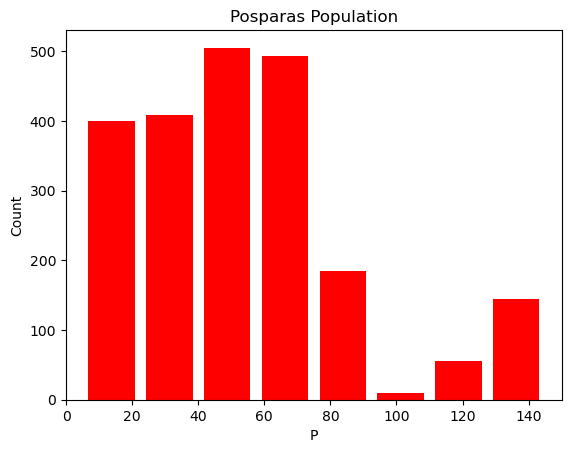

In [43]:
#Histogram
population_P = dataset["P"].tolist()

bins = 8

plt.hist(population_P, bins, histtype='bar', rwidth=0.8, color='red')

plt.xlabel('P')
plt.ylabel('Count')
plt.title('Posparas Population')
plt.show()

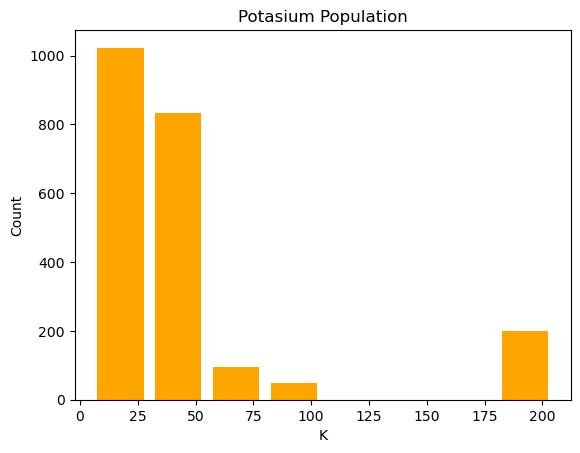

In [44]:
#Histogram
population_K = dataset["K"].tolist()

bins = 8

plt.hist(population_K, bins, histtype='bar', rwidth=0.8, color='orange')

plt.xlabel('K')
plt.ylabel('Count')
plt.title('Potasium Population')
plt.show()

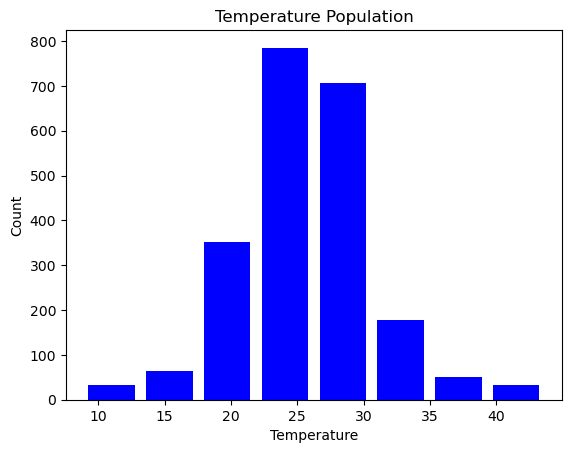

In [45]:
#Histogram
population_temp = dataset["temperature"].tolist()

bins = 8

plt.hist(population_temp, bins, histtype='bar', rwidth=0.8, color='blue')

plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature Population')
plt.show()

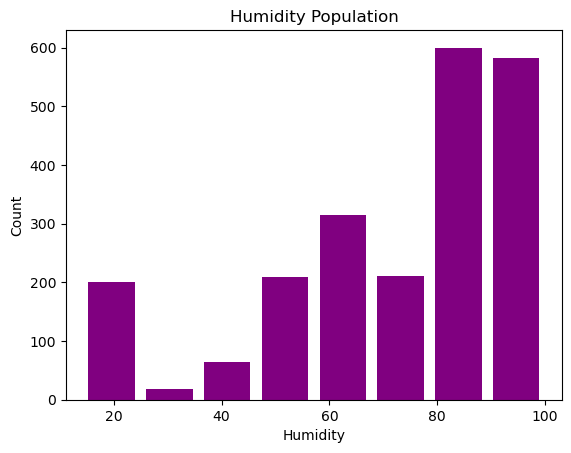

In [46]:
#Histogram
population_hum = dataset["humidity"].tolist()

bins = 8

plt.hist(population_hum, bins, histtype='bar', rwidth=0.8, color='purple')

plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Humidity Population')
plt.show()

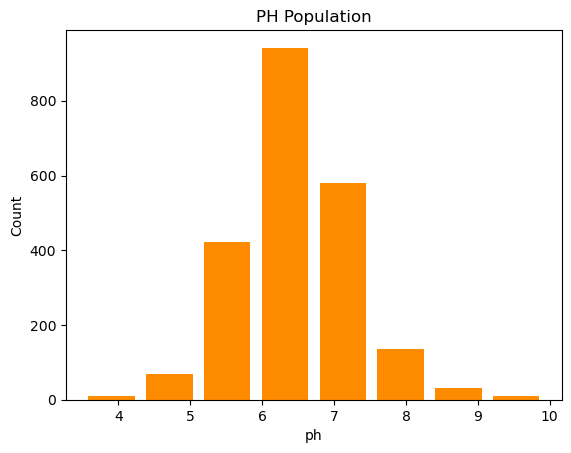

In [47]:
#Histogram
population_ph = dataset["ph"].tolist()

bins = 8

plt.hist(population_ph, bins, histtype='bar', rwidth=0.8, color='darkorange')

plt.xlabel('ph')
plt.ylabel('Count')
plt.title('PH Population')
plt.show()

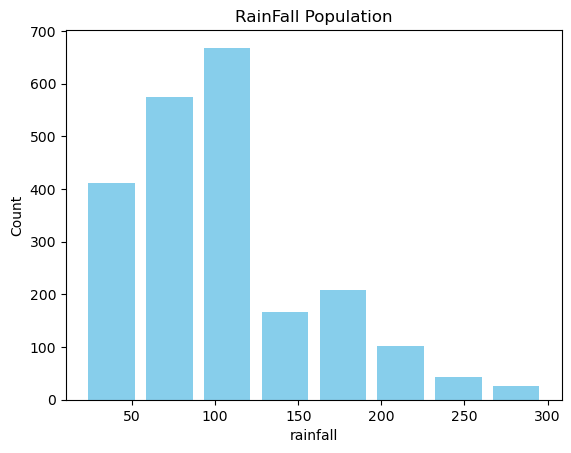

In [48]:
#Histogram
population_rain = dataset["rainfall"].tolist()

bins = 8

plt.hist(population_rain, bins, histtype='bar', rwidth=0.8, color='skyblue')

plt.xlabel('rainfall')
plt.ylabel('Count')
plt.title('RainFall Population')
plt.show()

In [49]:
#check missing or null values
dataset.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [50]:
#Detect and Remove Outliers

def detect_outlier(x):
  q1 = x.quantile(0.25)
  q3 = x.quantile(0.75)

  IQR = q3 - q1

  lower_limit = q1 - (1.5 * IQR)
  upper_limit = q3 + (1.5 * IQR)

  print(f"Lower limit : {lower_limit}  Upper limit :{upper_limit}")
  print(f"Minimum value :{x.min()} Maximum Value : {x.max()}")

  for i in [x.min(), x.max()]:
    if i == x.min():
      if lower_limit > x.min():
        print("Lower limit failed - Need to remove minimum Value")
      elif lower_limit <x.min():
        print("Lower limit Passes - No need to remove outlier")

    elif i == x.max():
         if upper_limit >x.max():
           print("Upper limit Passed - No need to remove outlier")
         elif upper_limit <x.max():
           print("Upper limit failed  - Need to remove maximum value") 

detect_outlier(dataset['K'][dataset['label']== 'grapes'])             

Lower limit : 188.0  Upper limit :212.0
Minimum value :195 Maximum Value : 205
Lower limit Passes - No need to remove outlier
Upper limit Passed - No need to remove outlier


In [51]:
#check limits
for i in dataset['label'].unique():
  print ('crop :',i)
  detect_outlier(dataset['K'][dataset['label']==i])
  print('-------------------------------------------------------------------------------')


crop : rice
Lower limit : 32.0  Upper limit :48.0
Minimum value :35 Maximum Value : 45
Lower limit Passes - No need to remove outlier
Upper limit Passed - No need to remove outlier
-------------------------------------------------------------------------------
crop : maize
Lower limit : 9.5  Upper limit :29.5
Minimum value :15 Maximum Value : 25
Lower limit Passes - No need to remove outlier
Upper limit Passed - No need to remove outlier
-------------------------------------------------------------------------------
crop : chickpea
Lower limit : 68.0  Upper limit :92.0
Minimum value :75 Maximum Value : 85
Lower limit Passes - No need to remove outlier
Upper limit Passed - No need to remove outlier
-------------------------------------------------------------------------------
crop : kidneybeans
Lower limit : 9.125  Upper limit :30.125
Minimum value :15 Maximum Value : 25
Lower limit Passes - No need to remove outlier
Upper limit Passed - No need to remove outlier
----------------------

In [52]:
#data preprocessing
Y =dataset['label']
encode = preprocessing.LabelEncoder()
y = encode.fit_transform(Y)
print("Label length: ",len(y))

Label length:  2200


In [53]:
# Standerlization and Normalization

# Extract the columns you want to standardize and normalize
X = dataset[['K', 'N', 'P']]

# Create scaler objects
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Standardize the data
X_standardized = standard_scaler.fit_transform(X)

# Normalize the data
X_normalized = minmax_scaler.fit_transform(X_standardized)

# Replace the original columns with the standardized and normalized columns
dataset[['K', 'N', 'P']] = X_normalized

# Print the first few rows of the standardized and normalized data
print(dataset.head())



          N         P      K  temperature   humidity        ph    rainfall  \
0  0.642857  0.264286  0.190    20.879744  82.002744  6.502985  202.935536   
1  0.607143  0.378571  0.180    21.770462  80.319644  7.038096  226.655537   
2  0.428571  0.357143  0.195    23.004459  82.320763  7.840207  263.964248   
3  0.528571  0.214286  0.175    26.491096  80.158363  6.980401  242.864034   
4  0.557143  0.264286  0.185    20.130175  81.604873  7.628473  262.717340   

  label  
0  rice  
1  rice  
2  rice  
3  rice  
4  rice  


In [54]:
#Model Training
#Spliting Dataset
x = dataset.drop(['label'],axis =1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,0.642857,0.264286,0.190,20.879744,82.002744,6.502985,202.935536
1,0.607143,0.378571,0.180,21.770462,80.319644,7.038096,226.655537
2,0.428571,0.357143,0.195,23.004459,82.320763,7.840207,263.964248
3,0.528571,0.214286,0.175,26.491096,80.158363,6.980401,242.864034
4,0.557143,0.264286,0.185,20.130175,81.604873,7.628473,262.717340


In [55]:
#train-test split
Y = dataset['label']
encode = preprocessing.LabelEncoder()
y = encode.fit_transform(Y)
X = dataset.drop('label', axis=1)
x_train, x_test, y_train ,y_test = train_test_split(x,y)
print(len(x_train),len(y_train),len(x_test),len(y_test))

1650 1650 550 550


In [56]:
# SVM Using Check Testing and Training data Accuracy
svm_model =svm.SVC(kernel ='linear',)
modelhistory =svm_model.fit(x_train,y_train)

svm_x_train_predict = svm_model.predict(x_train)
svm_train_accuracy = accuracy_score(y_train,svm_x_train_predict)

svm_x_test_predict = svm_model.predict(x_test)
svm_test_accuracy = accuracy_score(y_test,svm_x_test_predict)

print('SVM Accuracy Score of Test Data     : ' ,svm_test_accuracy)
print('SVM Accuracy Score of Training Data : ' ,svm_train_accuracy)
# print('Predicted Values                : ' ,svm_x_test_predict)


SVM Accuracy Score of Test Data     :  0.9545454545454546
SVM Accuracy Score of Training Data :  0.9703030303030303


In [57]:
# using Randomforestclassifier to  Check Testing and Training data Accuracy
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train,y_train)

rf_y_train_pred = random_forest.predict(x_train)
rf_y_test_pred = random_forest.predict(x_test)

rf_train_accuracy = accuracy_score(y_train, rf_y_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_y_test_pred)

print("RF Training Accuracy              :", rf_train_accuracy)
print("RF Testing Accuracy               :", rf_test_accuracy)
# print('Predicted Values               :', rf_y_test_pred)


RF Training Accuracy              : 1.0
RF Testing Accuracy               : 0.9945454545454545


In [58]:
# KNN Algorithm Using Check Testing and Training data Accuracy
 
knn_alogorithm = KNeighborsClassifier(n_neighbors=5) 
knn_alogorithm.fit(x_train, y_train)
 
knn_y_train_pred = knn_alogorithm.predict(x_train)
knn_y_test_pred = knn_alogorithm.predict(x_test)
 
knn_train_accuracy = accuracy_score(y_train, knn_y_train_pred)
knn_test_accuracy = accuracy_score(y_test, knn_y_test_pred)

print("KNN Training accuracy:", knn_train_accuracy)
print("KNN Testing accuracy:", knn_test_accuracy)
# print("Predicted Values:", y_test_pred)


KNN Training accuracy: 0.9272727272727272
KNN Testing accuracy: 0.8636363636363636


D:\Installation\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Installation\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [59]:
# Decision Tree algorithm use to Check Testing and Training data Accuracy

#Create decision tree model
decision_tree = DecisionTreeClassifier(max_depth=8)

#Fit training x and y sets
decision_tree.fit(x_train,y_train)

#Predict x test set
dt_x_test_predict = decision_tree.predict(x_test)
dt_test_accuracy = accuracy_score(y_test, dt_x_test_predict)

#Predict x train set
dt_x_train_predict = decision_tree.predict(x_train)
dt_train_accuracy = accuracy_score(y_train,dt_x_train_predict)

print("Decision tree test accuracy  : ", dt_test_accuracy)
print("Decision tree train accuracy : ", dt_train_accuracy)


Decision tree test accuracy  :  0.9781818181818182
Decision tree train accuracy :  0.9915151515151515


In [60]:
#Dictionary

grid = {
    'svm_model':{
        'model':SVC(gamma ='auto' , probability =True),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 150, 200],
            'max_depth': [5, 10, 15, 20],
            'min_samples_split': [2, 5, 10, 15]
        }
    },
    'knn_alogorithm':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[5,10,15,20],
            'weights':['uniform','distance']
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'max_depth':[5,10,15,20]
        }
    }
}


In [62]:
score=[]
best_params = {}
for algorithm in grid:
    grid_search = GridSearchCV(grid[algorithm]['model'], grid[algorithm]['params'], cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)

    score.append({
        "Model ":algorithm,
        "Best score ":accuracy_score(y_test, grid_search.predict(x_test)),
        "Best param ":grid_search.best_params_
    })
    best_params[algorithm] = grid_search.best_estimator_

D:\Installation\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Installation\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [63]:
score

[{'Model ': 'svm_model',
  'Best score ': 0.98,
  'Best param ': {'C': 100, 'kernel': 'linear'}},
 {'Model ': 'random_forest',
  'Best score ': 0.9927272727272727,
  'Best param ': {'max_depth': 20,
   'min_samples_split': 10,
   'n_estimators': 150}},
 {'Model ': 'knn_alogorithm',
  'Best score ': 0.8690909090909091,
  'Best param ': {'n_neighbors': 5, 'weights': 'distance'}},
 {'Model ': 'decision_tree',
  'Best score ': 0.9781818181818182,
  'Best param ': {'criterion': 'gini', 'max_depth': 15}}]

In [64]:
pd.DataFrame(score)

,Model,Best score,Best param
0,svm_model,0.980000,"{'C': 100, 'kernel': 'linear'}"
1,random_forest,0.992727,"{'max_depth': 20, 'min_samples_split': 10, 'n_..."
2,knn_alogorithm,0.869091,"{'n_neighbors': 5, 'weights': 'distance'}"
3,decision_tree,0.978182,"{'criterion': 'gini', 'max_depth': 15}"


In [66]:
#Predicting Using Random Forest Classifier
predicted_res = best_params['random_forest'].predict(x_test)
predicted_res

array([ 9,  5, 14, 16,  2, 21, 12,  7,  8, 10,  9,  6, 12,  0,  5,  9, 17,
       12,  2, 10, 14, 17, 20, 20, 10,  1, 20, 21, 17, 19, 15, 19,  1,  3,
        8, 11,  2,  7, 21,  9,  4, 21, 17, 18,  3,  8,  8, 18,  3, 13, 10,
        5,  6,  7, 12, 18, 15, 18,  0, 15, 11,  8, 16, 13, 19, 11, 17,  3,
        8, 11, 19,  7, 18,  6, 14,  7, 18,  8, 13,  6,  1,  4,  0, 15,  1,
        0,  7, 13,  2, 12, 13,  6,  4, 18, 14, 14, 16, 19, 15, 12, 11, 19,
        4,  6, 17,  2, 13, 14, 12, 20, 10,  8, 21,  5,  0,  2,  7, 17, 15,
        4,  6,  1,  9,  0,  0, 20, 20,  3,  2,  3,  1,  7, 20, 17, 12,  5,
        2, 16,  3, 11,  4, 13, 19, 17,  3,  3,  5, 12, 14,  4, 18, 20, 14,
        5,  7, 19,  7,  0, 21, 16,  3, 13,  9, 19, 17, 21,  3,  9, 11, 19,
       15, 17, 13, 14, 21, 19, 13, 14, 16, 18, 12, 15, 15, 21,  0,  0,  6,
        7, 14,  4,  8, 14,  5,  7,  0, 19,  7, 17, 21, 17, 15,  2,  5,  4,
        8, 18,  0,  6, 15, 13,  9,  1,  6,  2,  2, 21, 19,  6, 12, 13, 10,
       17,  5, 17,  6, 19

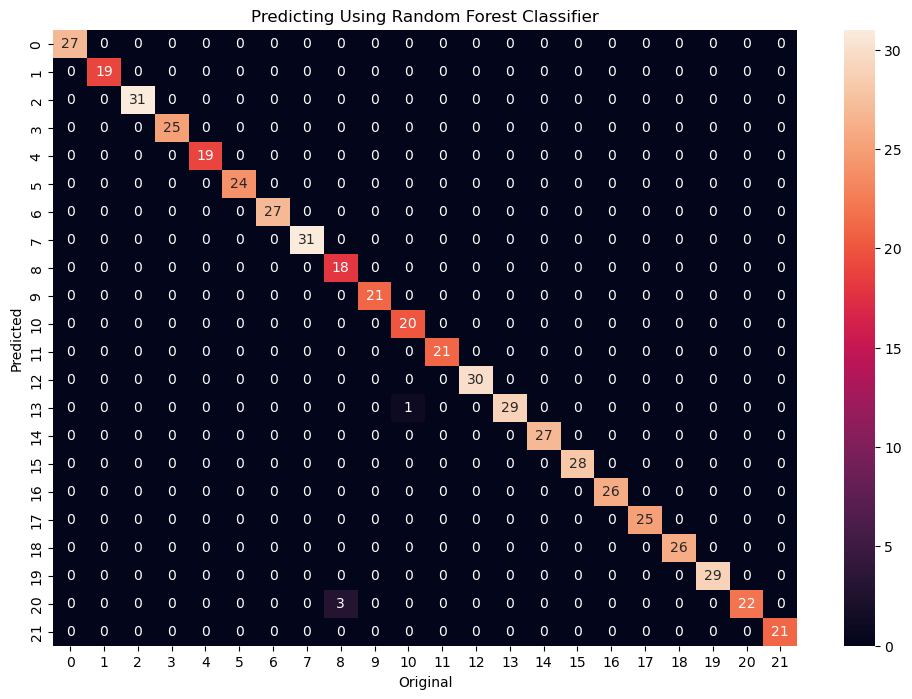

In [67]:
plt.figure(figsize=(12,8))
plt.title('Predicting Using Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test,predicted_res),annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

In [70]:
# Bagging

# Create a Random Forest Classifier
rfc = make_pipeline(preprocessing.StandardScaler(),RandomForestClassifier(n_estimators=10 ))

# Create a Bagging Classifier with the Random Forest Classifier as the base estimator
bag_rfc = BaggingClassifier(base_estimator=rfc, n_estimators=100,oob_score=True,random_state=0,max_samples=0.8)

# Fit the Bagging Classifier to the training data
bag_rfc.fit(x_train, y_train)

BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler' ,StandardScaler()),('randomforestclassifier',RandomForestClassifier(n_estimators=10))]),max_samples=0.8,n_estimators=100,oob_score=True,random_state=0)

# Make predictions on the training and testing data
# train_pred = bag_rfc.predict(x_train)
# test_pred = bag_rfc.predict(x_test)

bag_rfc.score(x_test, y_test)

0.9945454545454545

In [71]:
# Final Report

print(classification_report(y_test,predicted_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        31
           8       0.86      1.00      0.92        18
           9       1.00      1.00      1.00        21
          10       0.95      1.00      0.98        20
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        30
          13       1.00      0.97      0.98        30
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        28
          16       1.00      1.00      1.00        26
          17       1.00    